In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime
from scipy.stats import ttest_1samp

In [2]:
data = pd.read_excel("definitief_Overzicht02-03-2025_16_41.xlsx")

data.head()

,Factuur nr op factuur,Bedrag op factuur,Bedrag betaald,Klant,Datum factuur,Datum betaling,Status,Regel in betalingsdocument
0,A2024001,1130.00,1130.00,Restaurant aan de oever,2024-12-05,2025-01-10,Betaald,0
1,A2024002,519.99,520.00,Schilder van den brugge,2024-12-05,2025-01-10,Betaald,0
2,A2024011,1940.00,1970.50,Restaura van den brugge,2024-12-05,2025-01-11,Bedrag komt niet overeen,4
3,A2024022,22.50,22.50,Restaura van den brugge,2025-01-01,2025-01-12,Betaald,0
4,A2024052,1739.74,1739.75,Schilder van den brugge,2025-01-01,2025-01-13,Betaald,0


In [3]:
betaalde_facturen = data[data["Status"] == "Betaald"].copy()
betaalde_facturen.loc[:, "Duur betaling in dagen"] = (betaalde_facturen["Datum betaling"] - betaalde_facturen["Datum factuur"]).dt.days.astype(int)

lijst_klanten = []
for klant in betaalde_facturen["Klant"]:
    if klant not in lijst_klanten:
        lijst_klanten.append(klant)

gem_duur_perklant = []
pwaarde_perklant = []

for klant in lijst_klanten:
    gemiddelde_dagen = 0
    tijdelijk_db = betaalde_facturen[betaalde_facturen["Klant"] == klant]
    for dagen in tijdelijk_db["Duur betaling in dagen"]:
        gemiddelde_dagen += dagen
    if gemiddelde_dagen != 0:
        gemiddelde_dagen = gemiddelde_dagen / len(tijdelijk_db["Duur betaling in dagen"])
    gem_duur_perklant.append(round(gemiddelde_dagen, 2))
    tstat, pval = ttest_1samp(tijdelijk_db["Duur betaling in dagen"], round(gemiddelde_dagen, 2))
    pwaarde_perklant.append(pval)

print(gem_duur_perklant)
print(pwaarde_perklant)


[36.0, 38.0, 52.5, 93.0]
[nan, 1.0, 1.0, nan]


c:\Users\kvvee\miniconda3\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\kvvee\miniconda3\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


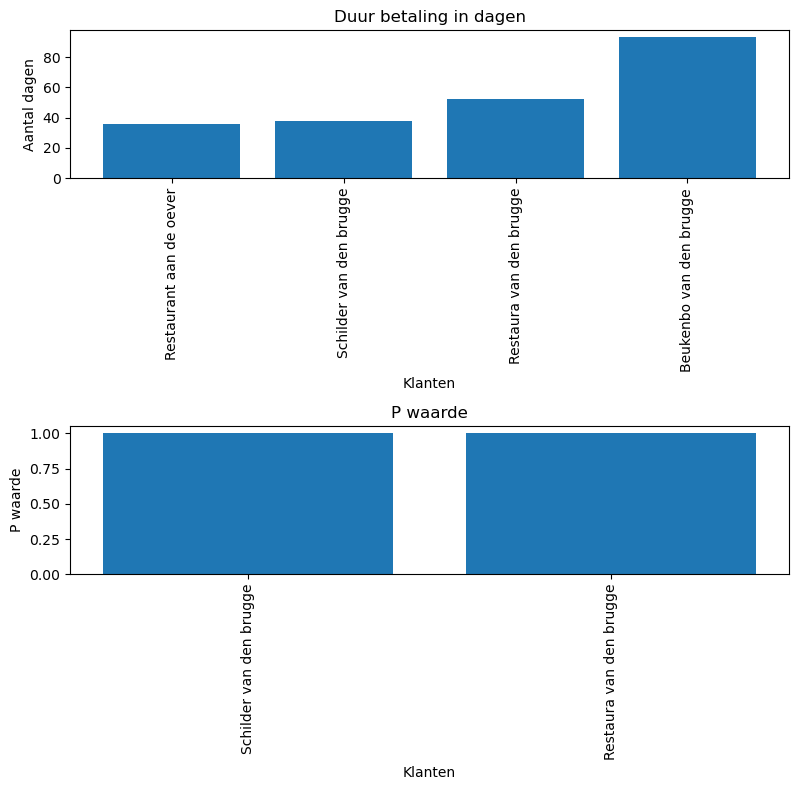

In [4]:
plt.figure(figsize=(8, 8))
plt.subplot(2,1,1)
plt.title("Duur betaling in dagen")
plt.bar(x=lijst_klanten, height=gem_duur_perklant)
plt.xlabel("Klanten")
plt.ylabel("Aantal dagen")
plt.xticks(rotation=90)
plt.subplot(2,1,2)
plt.title("P waarde")
plt.bar(x=lijst_klanten, height=pwaarde_perklant)
plt.xlabel("Klanten")
plt.ylabel("P waarde")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

De Pwaarde geeft de waarschijnlijkheid van het veronderstelde gemiddelde tegenover het daadwerkelijk populatie gemiddelde weer. Het laat in dit geval zien dat de berekende gemiddelden erg onwaarschijnlijk de populatiegemiddelden aantonen. We houden waarschijnlijkheidsdrempel van 0.05 vast.